In [51]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [52]:
im = cv2.imread('puma1.png')
img = im.copy()
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [53]:
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
im=cv2.drawContours(im, contours, -1, (255,0,0), 3)

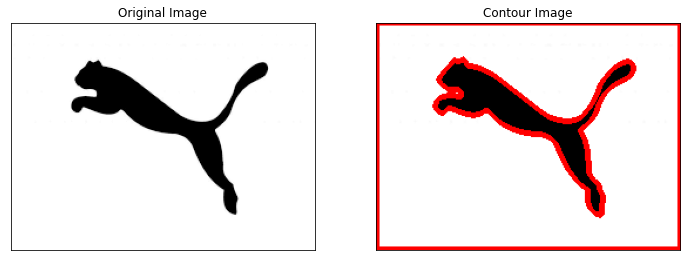

In [54]:
plt.figure(figsize=(12,9))
plt.subplot(121), plt.imshow(imgray,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(im,cmap = 'gray')
plt.title('Contour Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [55]:
len(contours)

2

In [76]:
contours[1].shape

(295, 1, 2)

In [57]:
# Moments

In [58]:
cnt = contours[1]
M = cv2.moments(cnt)
print(M)

{'m00': 5153.5, 'm10': 669546.6666666666, 'm01': 407182.6666666666, 'm20': 97667100.75, 'm11': 56542666.95833333, 'm02': 36559071.75, 'm30': 15488246005.900002, 'm21': 8595572471.083334, 'm12': 5433172328.383333, 'm03': 3684983583.5, 'mu20': 10679085.062710896, 'mu11': 3641183.075319633, 'mu02': 4387203.304520667, 'mu30': 24391661.525161743, 'mu21': -67323523.98674929, 'mu12': 108003434.33067715, 'mu03': 103144715.25316334, 'nu20': 0.4020957521038586, 'nu11': 0.1371001577963669, 'nu02': 0.16518978938781473, 'nu30': 0.012793391312381356, 'nu21': -0.035311091292509436, 'nu12': 0.05664764563283571, 'nu03': 0.054099254479922865}


In [59]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

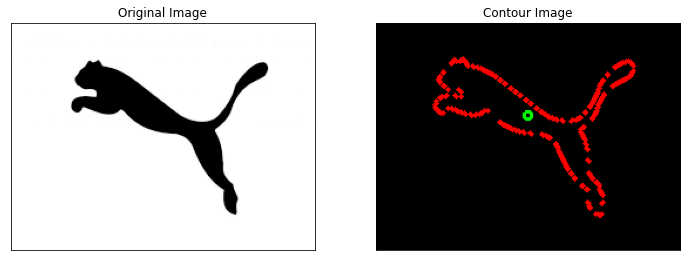

In [60]:
img = np.zeros(im.shape, np.uint8)
# img = cv2.circle(img,(cx,cy),3,(0,0,255),2)
img = cv2.circle(img,(cx,cy),3,(0,255,0),2)
# img = cv2.circle(img,(cx,cy),3,(255,0,0),2)
img = cv2.drawContours(img, contours[1], -1, (255,0,0), 3)

plt.figure(figsize=(12,6))
plt.subplot(121), plt.imshow(imgray,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img,cmap = 'gray')
plt.title('Contour Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [61]:
# contour area

In [62]:
area = cv2.contourArea(cnt)

In [63]:
# Contour Perimeter

In [64]:
perimeter = cv2.arcLength(cnt,True)

In [65]:
# Contour Approximation

In [66]:
epsilon = 0.00001*cv2.arcLength(cnt,True) # 10 %
approx = cv2.approxPolyDP(cnt,epsilon,True)

In [67]:
imgA = np.zeros(im.shape, np.uint8)
imgA = cv2.drawContours(imgA, approx, -1, (255,0,0), 1)

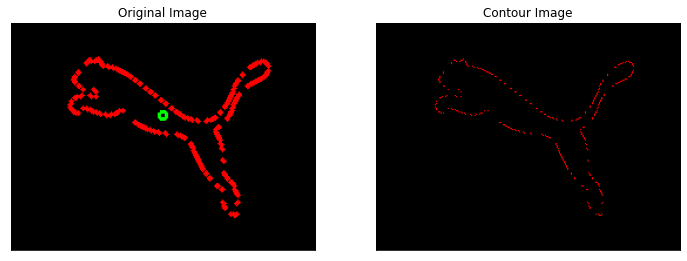

In [68]:
plt.figure(figsize=(12,6))
plt.subplot(121), plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imgA,cmap = 'gray')
plt.title('Contour Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [69]:
# convex set
# 두 점을 잇는 선이 특정 집합 안에 속하는것을 convex set이라고 함.
# 선이 집합에 완전히 속해있지 않으면 non-convex set 이라고 함.
# convex hull
# 

In [70]:
# convex hull
hull = cv2.convexHull(cnt)

In [71]:
# imgH = np.zeros(im.shape, np.uint8)
imgH = cv2.drawContours(img, [hull], -1, (0,255,0), 3)

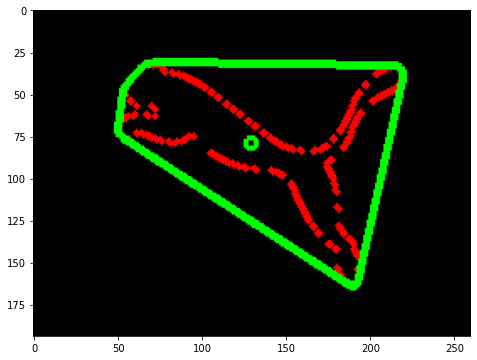

In [72]:
plt.figure(figsize=(12,6))
plt.imshow(imgH,cmap = 'gray')
plt.show()

In [73]:
x,y,w,h = cv2.boundingRect(cnt)
img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

In [74]:
# Boundary and Rotate Rectangle
# try by my self

In [75]:
# # fitting rectangle
# x,y,w,h = cv2.boundingRect(cnt)
# imgBR = cv2.rectangle(imgA,(x,y),(x+w,y+h),(0,255,0),2)
# plt.figure(figsize=(12,6))
# plt.imshow(imgBR,cmap = 'gray')
# plt.show()

# # Rotated Rectangle
# rect = cv2.minAreaRect(cnt)
# box = cv2.boxPoints(rect)
# box = np.int0(box)
# imgRR = cv2.drawContours(imgA,[box],0,(0,0,255),2)
# plt.figure(figsize=(12,6))
# plt.imshow(imgRR,cmap = 'gray')
# plt.show()

# # Maximum enclosing circle
# (x,y),radius = cv2.minEnclosingCircle(cnt)
# center = (int(x),int(y))
# radius = int(radius)
# imgMEC = cv2.circle(imgA,center,radius,(0,255,0),2)
# plt.figure(figsize=(12,6))
# plt.imshow(imgMEC,cmap = 'gray')
# plt.show()

# # fitting elips
# ellipse = cv2.fitEllipse(cnt)
# imgFE = cv2.ellipse(imgA,ellipse,(0,255,0),2)
# plt.figure(figsize=(12,6))
# plt.imshow(imgFE,cmap = 'gray')
# plt.show()

# # fitting line
# rows,cols = img.shape[:2]
# [vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)
# lefty = int((-x*vy/vx) + y)
# righty = int(((cols-x)*vy/vx)+y)
# imgFR = cv2.line(imgA,(cols-1,righty),(0,lefty),(0,255,0),2)
# plt.figure(figsize=(12,6))
# plt.imshow(imgFR,cmap = 'gray')
# plt.show()